In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
data = pd.read_csv("spam_ham_dataset.csv")

In [3]:
data.head(15)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [4]:
x = data['text']
y = data['label_num']

In [5]:
m = data.groupby('label_num').count()
m

,Unnamed: 0,label,text
label_num,,,
0,3672,3672,3672
1,1499,1499,1499


In [6]:
r = m['label']
r


label_num
0    3672
1    1499
Name: label, dtype: int64

In [7]:
t = m.index.values
t

array([0, 1], dtype=int64)

<BarContainer object of 2 artists>

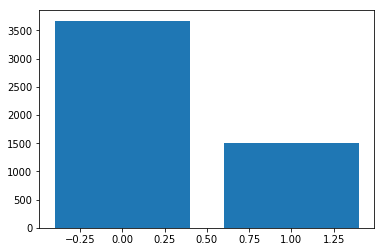

In [8]:
plot.bar(t,r)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [10]:
x = vect.fit_transform(x)

In [11]:



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x,y)

F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
inp2 = ['''To: Henrycooper@gmail.com Sub: Business Introduction Dear Mr. Cooper
I would like to introduce our organization Mates Cleaners Limited that specializes in the business of providing cleaning services to various office premises.
We have been specializing in this business since last ten years. Our client list includes the reputed organizations in the city. We not only provide cleaning services, but also plumbing service and cleaning of the sewage pipes and drains. Our clients have been satisfied by our service and we have never received a single complaint since the inception of the business. It would be a great honor do business with you and that will add another reputed organization in our client list.
I would be highly grateful if you consider us for providing cleaning service to your office premise. I am also attaching a word file stating our quotation. In case of any further query you can mail us ''']

In [13]:
inp2 = vect.transform(inp2)
clf.predict(inp2)

array([0], dtype=int64)

In [14]:
inp3 = ['Congratulations You have won 10000$. FREE FREE FREE .Come and collect.']
inp3 = vect.transform(inp3)

In [15]:
clf.predict(inp3)

array([1], dtype=int64)

In [16]:
# converting model into pickle

In [24]:
from sklearn.externals import joblib
joblib.dump(clf,'spam.sav')
joblib.dump(vect,'vecto.sav')


['vecto.sav']